<pre style="background-color: gray;">
All required Libraries and Packages will be install from requirements.txt file
</pre>

<pre style="background-color: gray;">
 <b>STEP 1:</b> Import All Dependencies
</pre>

In [2]:
#Importing Data Preprocessing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [3]:

#machine learning dependencies
from collections import Counter
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

<pre style="background-color: gray;">
 Load DataSet
</pre>

In [4]:
data = pd.read_csv("creditcard.csv")

<h2 style="background-color:gray;"> Exploratory Data Analysis</h2>

<pre style="background-color: gray;">
  Show First five rows of the Dataset
</pre>

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<pre style="background-color: gray;">
 Read number of rows and columns
</pre>

In [7]:
print(f"No. of rows in the dataset ==>> {data.shape[0]}")
print(f"No. of columns in the dataset ==>> {data.shape[1]}")

No. of rows in the dataset ==>> 284807
No. of columns in the dataset ==>> 31


<pre style="background-color: gray;">
 It will show all columns in the dataset
</pre>

In [8]:
pd.options.display.max_columns = None

<pre style="background-color: gray;">
 Display all columns in the Dataset
</pre>

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<pre style="background-color: gray;">
 Display last five rows in the dataset
</pre>

In [10]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<pre style="background-color: gray;">
Display the shape of the dataset
</pre>

In [11]:
data.shape

(284807, 31)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<h5 style="background-color: gray;">Heat Map</h5>

Text(0.5, 1.0, 'Heat map of Correlation')

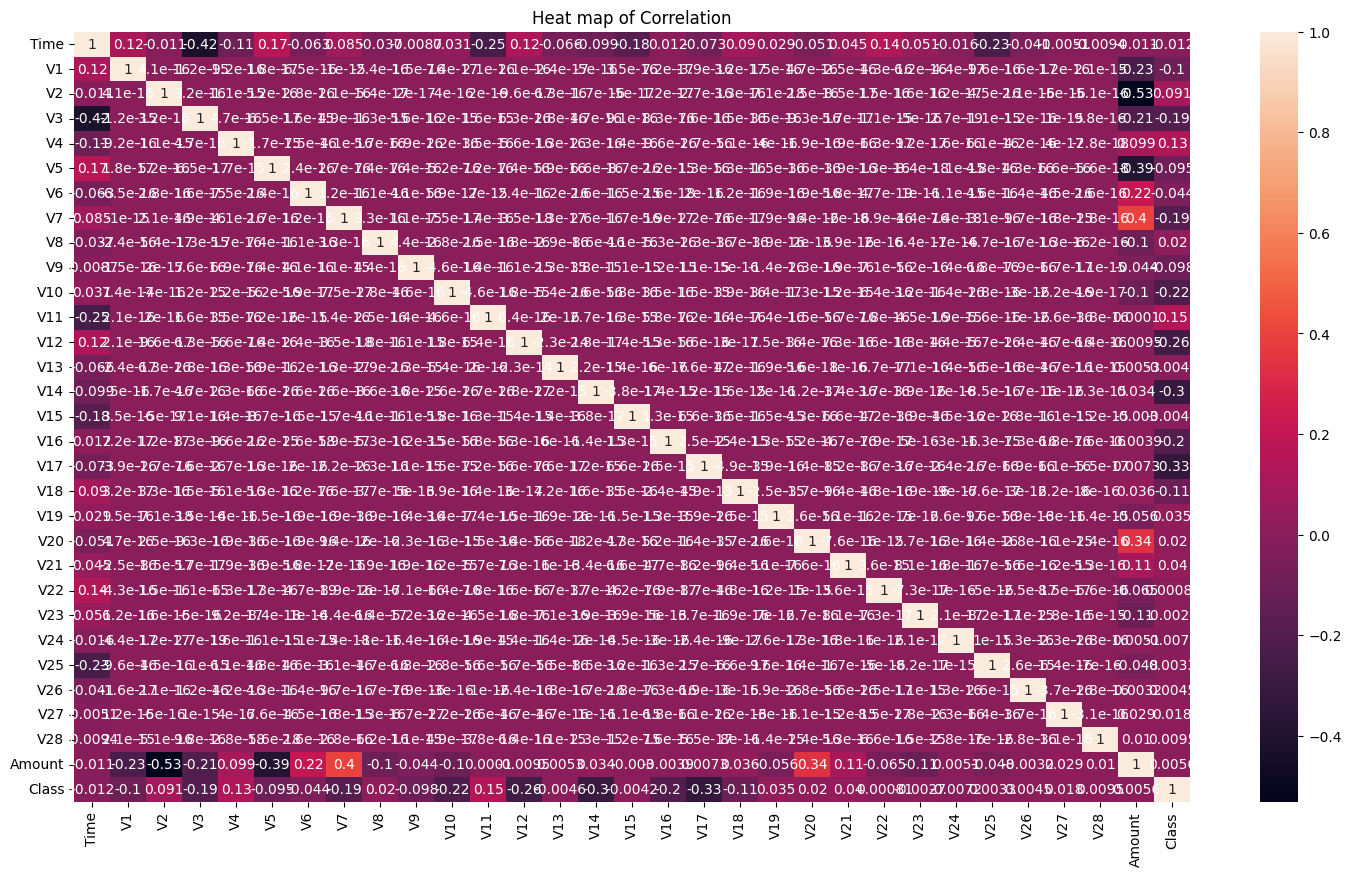

In [13]:
corr = data.corr()
plt.figure(figsize=(18,10))
heat = sns.heatmap(data=corr,annot=True)
plt.title("Heat map of Correlation")

<h2 style="background-color: gray;">
DATA PREPROCESSING
</h2>

<pre style="background-color: gray;">
1. Checking null values in the dataset
</pre>

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<pre style="background-color: gray;">
Analysis of Amount column
</pre>

In [15]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<pre style="background-color:gray;">
Visualization of Amount column data
</pre>

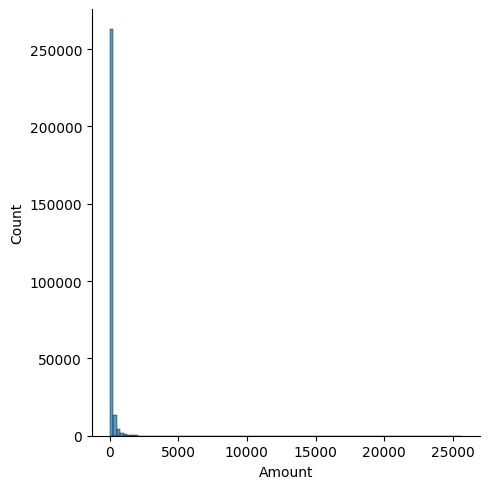

In [16]:
sns.displot(data['Amount'],bins=100)
plt.show()

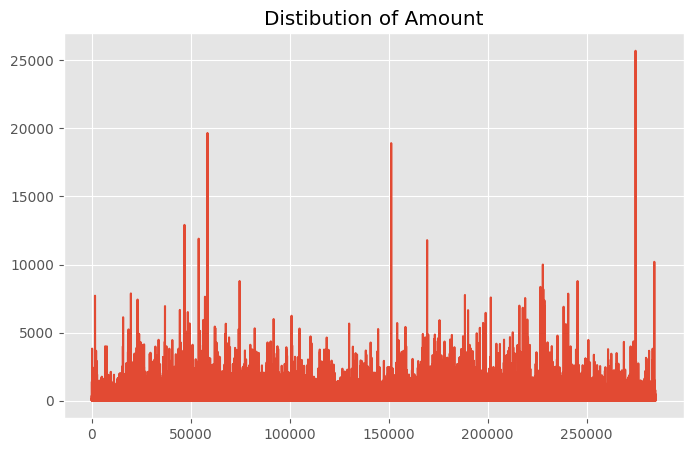

In [17]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Amount")
    plt.plot(data["Amount"])
    plt.show()

<pre style="background-color: gray;">
2. Converting Amount Column data into standard scale
</pre>

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [20]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


<pre style="background-color: gray;">
3. Drop Time column
</pre>

In [21]:
data = data.drop(['Time'], axis =1)

In [56]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


<pre style="background-color: gray;">
4. Check for duplicate entry in the dataset
</pre>

In [22]:
data.duplicated().any()

True

<pre style="background-color: gray;">
5. Drop duplicate entry from the dataset
</pre>

In [23]:
data = data.drop_duplicates()

<pre style="background-color: gray">
Before dropping duplicate entries, total entries = 284807.
After dropping duplicate entries, total entries = 275663.
Therefore, Below shape shows 9144 as a duplicated entries.
</pre>

In [59]:
data.shape

(275663, 30)

<div style="background-color: gray;">
<pre>
Display Number of fraud and Normal transactions.
Below shows:
            No of Fraud transaction: 473
            No of Normal transaction: 275190
In conclusion, number of normal transactions are much more higher 
than number fraud transactions in the dataset which 
result imbalance of dataset.
<pre>
</div>

<p style="background-color: gray;">
Class Imbalance Whenever there is an issae with a classification problem and the classes are not represented equaly, we say that the data is imbalanced. Applying classifiers to the dataset would most likely result in inaccurate predictions for every category. This was seen as a hurdle when attempting to learn from extremely unbalanced data sets.
</p>

In [24]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

<pre style="background-color: gray;">
Percentage of Fraud Transaction?
</pre>

In [25]:
fraudPercentage = round((len(data[data.Class==1])/len(data[data.Class==0]))*100,2)
print(f"The percentage of fraud transactions is {fraudPercentage} %")

The percentage of fraud transactions is 0.17 %


<pre style="background-color: gray">
Visualization of Class column data
</pre>

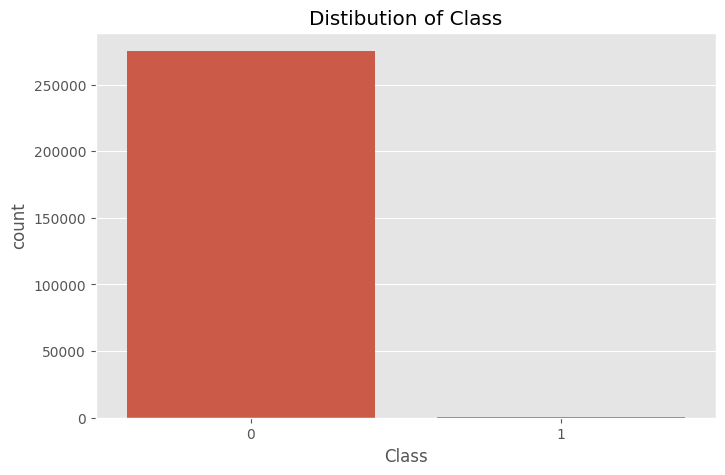

In [26]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

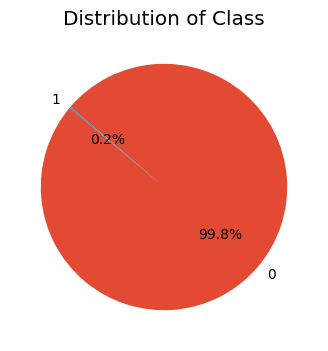

In [29]:
# Count the occurrences of each class
class_counts = data["Class"].value_counts()

# Plot the pie chart
with plt.style.context(('ggplot')):
    plt.figure(figsize=(4,4))
    plt.title("Distribution of Class")
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.show()

In [63]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [64]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


<pre style="font-size: 200 px; color: Green">
<b>Testing Different Algorithms performance Before Handling Imbalance data</b>
</pre>

<pre style="background-color:gray;">
<b>Train</b>
<b>Test</b>
<b>Calculate Accuracy of different ML and CNN model
before handling imbalance dataset<b>
</pre>

<pre style="background-color: gray">
Split Dataset into Train and Test
</pre>

In [65]:
x=data.drop(["Class"],axis=1)
y=data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h4 style="background-color:gray;">
Define Method for Calculating various metrics and confusion matrix
</h4>

<div style="background-color: gray;">
<p>
<b>Result:</b>
<ul>
<li>True Negative (TN) -85,251 no.: Genuine transactions correctly identified as real.</li>
<li>True Positive (TP)- 92 instances: Fraudulent transactions correctly identified as fraud.</li>
<li>False Negative (FN) - 52 instances: Fraudulent transactions incorrectly identified as genuine.</li>
<li>False Positive (FP) - 48 instances: Genuine transactions incorrectly identified as fraud.</li>
</div>

In [66]:
def Classification_Metrics(y_test,y_pred):
    accuracy = metrics.accuracy_score(y_test,y_pred)
    auc = metrics.roc_auc_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    
    print(f'Accuracy: {accuracy:.5f}')
    print(f'AUC: {auc:.5f}')
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}')
    print(f'F1 Score: {f1_score:.5f}\n')
    
    # Confusion Metrix
    print("Confusion Matrix")
    cf = confusion_matrix(y_test, y_pred,normalize='true')
    sns.heatmap(cf,annot=True,cmap='OrRd')
    # cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
    # print(cnf_matrix)

<h4 style="background-color:gray;">
Define Method for displaying <b>ROC Curve</b>
</h4>

<p style="background-color:gray;">
ROC The ROC is a measure of how well classification problems work at different levels. It is basically a probability curve, and the better the
model is at predicting whether a transaction is fraud or not the higher the Area Under the Curve (AUC) number.<br><br>
It is a way to measure how well the model can tell the difference between two possible results. It shows if a model can clearly divide the
positive class from the negative class.
</p>

In [67]:
def Plot_Roc_Curve(y_test, y_pred, name):
    print("\n\nROC Curve")
    #Create a figure with a specific size
    plt.figure(figsize=(6,5))
    
    # Calculate ROC Curve Values
    fpr,tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    
    # Calculate the AUC Score
    auc = metrics.roc_auc_score(y_test,y_pred)
    print(f'AUC Score: {auc}\n')
    
    #Plot the Roc Curve
    plt.plot(fpr,tpr,linewidth=2,label="AUC = {:.2f}".format(auc))
    plt.legend(loc=4)
    
    #Adding the diagonal line
    plt.plot([0,1],[0,1],'--')
    
    #Customize plot labels and title
    plt.rcParams['font.size'] =8
    plt.title('ROC curve for Credit Card Fraud Detection using '+name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    #Display the plot
    plt.show()


==========Logistic Regression===========
Accuracy: 0.99926
AUC: 0.81312
Precision: 0.89062
Recall: 0.62637
F1 Score: 0.73548

Confusion Matrix


ROC Curve
AUC Score: 0.8131232253811375



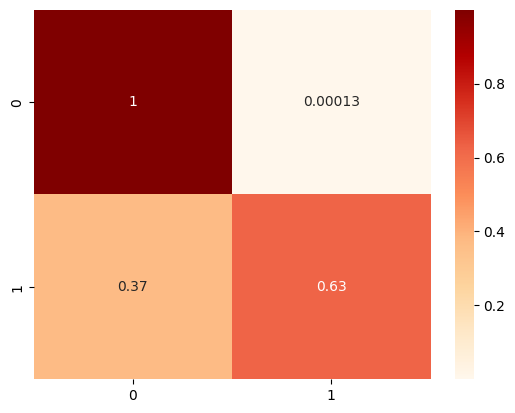

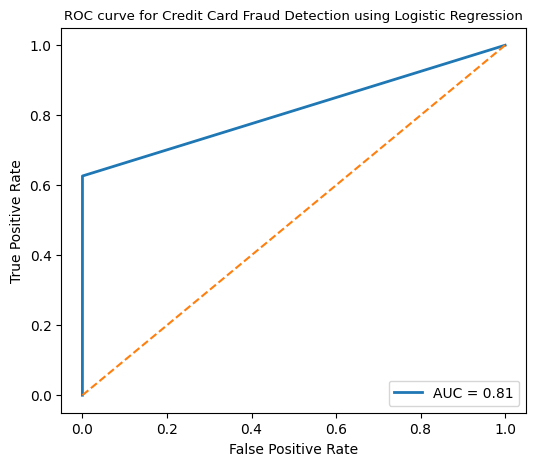


==========Decision Tree Classifier===========
Accuracy: 0.99902
AUC: 0.87883
Precision: 0.68317
Recall: 0.75824
F1 Score: 0.71875

Confusion Matrix


ROC Curve
AUC Score: 0.8788301920092189



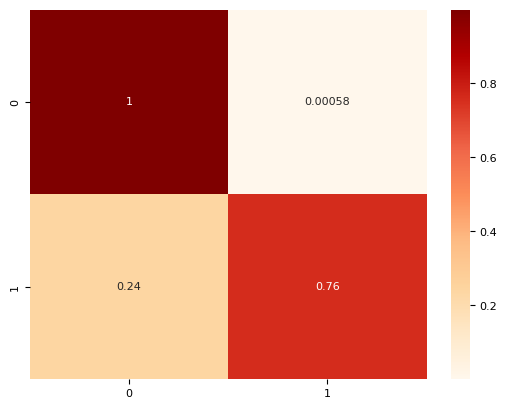

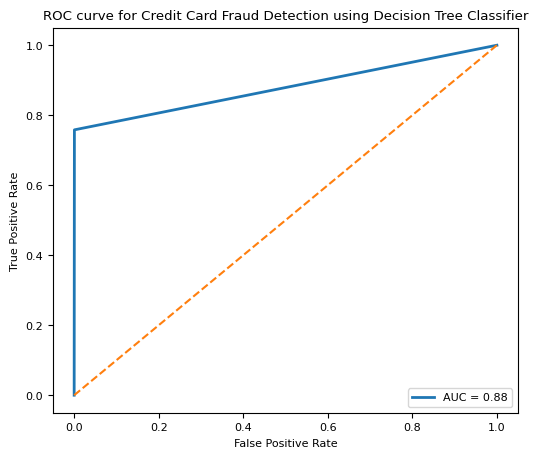


==========Random Forest Classifier===========
Accuracy: 0.99946
AUC: 0.86808
Precision: 0.91781
Recall: 0.73626
F1 Score: 0.81707

Confusion Matrix


ROC Curve
AUC Score: 0.8680773642984319



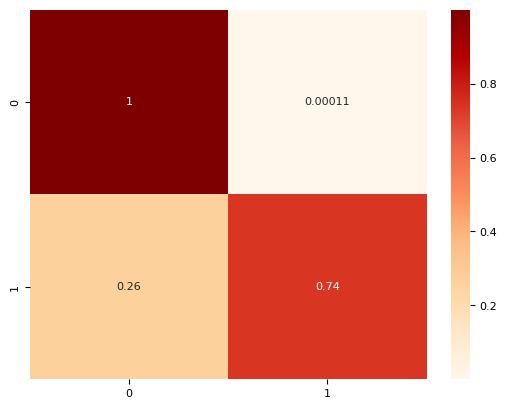

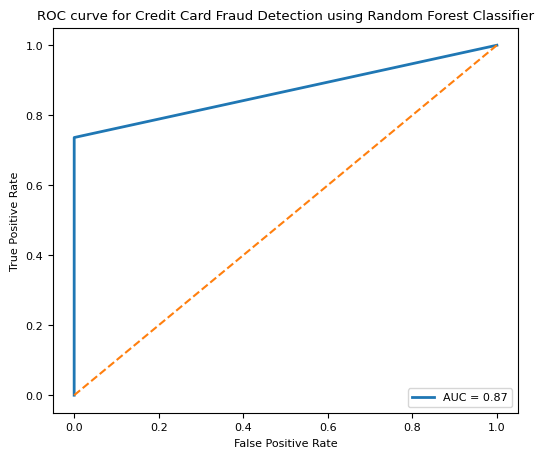


==========Gaussian Naive Bayes===========
Accuracy: 0.97816
AUC: 0.88484
Precision: 0.05728
Recall: 0.79121
F1 Score: 0.10682

Confusion Matrix


ROC Curve
AUC Score: 0.8848398885007294



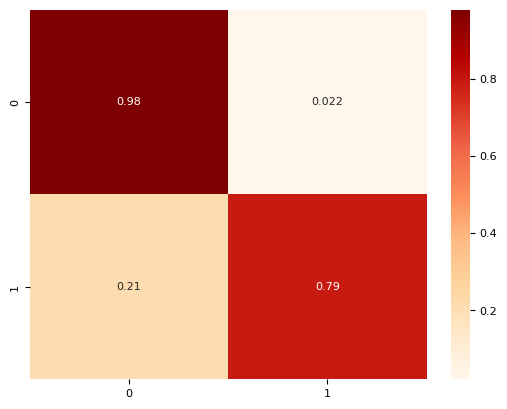

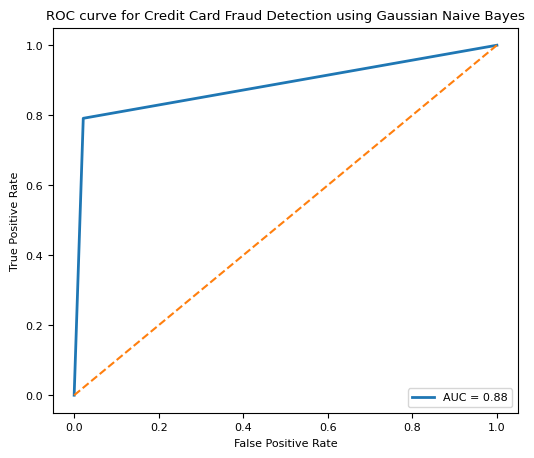


==========Support Vector Machine===========
Accuracy: 0.99933
AUC: 0.81864
Precision: 0.93548
Recall: 0.63736
F1 Score: 0.75817

Confusion Matrix


ROC Curve
AUC Score: 0.8186449827923611



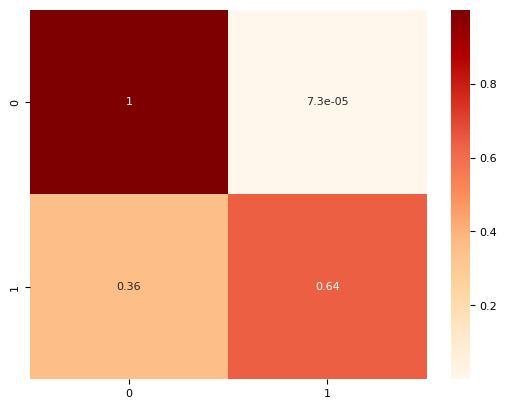

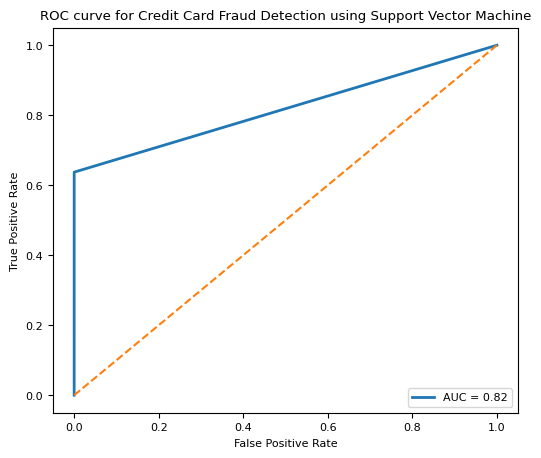


==========XGBoost===========
Accuracy: 0.99947
AUC: 0.87906
Precision: 0.90789
Recall: 0.75824
F1 Score: 0.82635

Confusion Matrix


ROC Curve
AUC Score: 0.8790572913152035



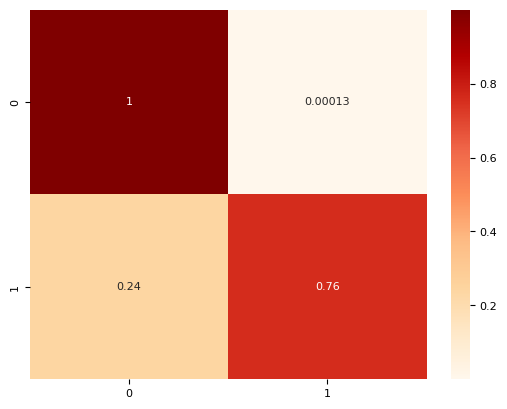

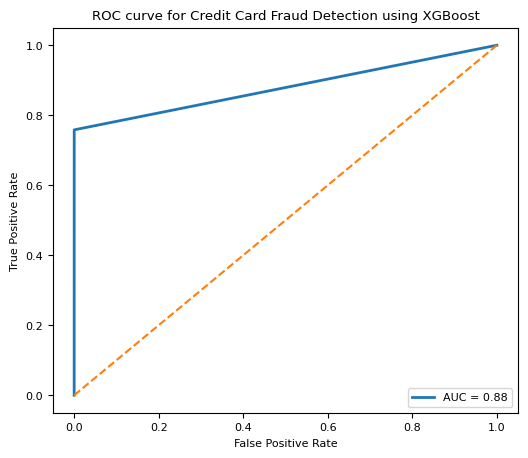


==========Extra_Tree_Classifier===========
Accuracy: 0.99942
AUC: 0.85160
Precision: 0.92754
Recall: 0.70330
F1 Score: 0.80000

Confusion Matrix


ROC Curve
AUC Score: 0.8516029317871548



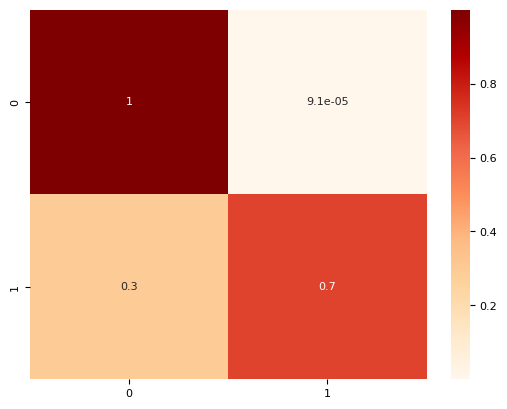

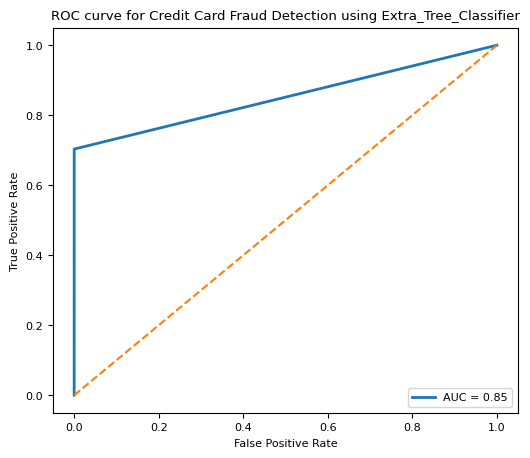


==========LGBM===========
[LightGBM] [Info] Number of positive: 382, number of negative: 220148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 220530, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001732 -> initscore=-6.356635
[LightGBM] [Info] Start training from score -6.356635
Accuracy: 0.99481
AUC: 0.69570
Precision: 0.13483
Recall: 0.39560
F1 Score: 0.20112

Confusion Matrix


ROC Curve
AUC Score: 0.6957038002149009



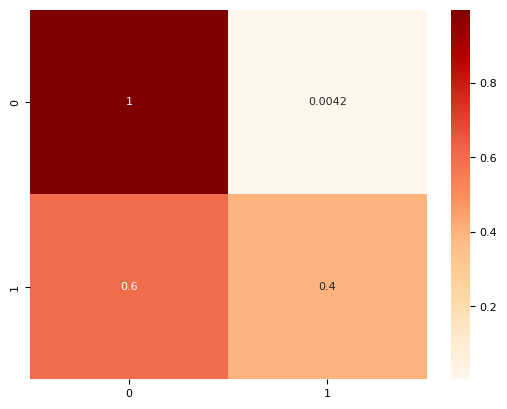

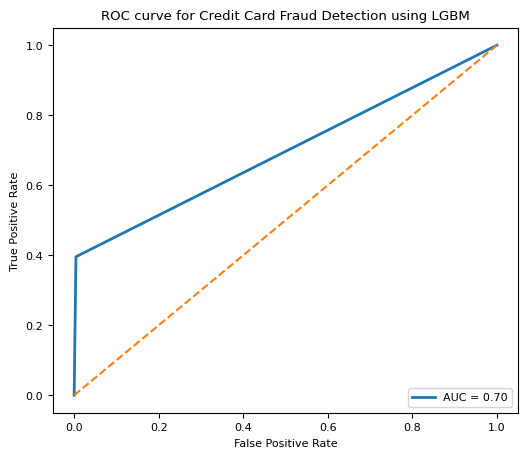

In [68]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Support Vector Machine" : svm.SVC(),
    "XGBoost" : XGBClassifier(max_depth=2),
    "Extra_Tree_Classifier" : ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2),
    "LGBM" : LGBMClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Classification_Metrics(y_test,y_pred)
    Plot_Roc_Curve(y_test, y_pred,name)

<h2 style="background-color: gray;">
Train, Testing and checking accuracy using Neural network
</h2>

<h5 style="background-color: gray;">
Importing all dependences
</h5>

In [69]:
import tensorflow as tf
from collections import Counter
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from keras.callbacks import TensorBoard


In [70]:
def NeuralNetwork(X_train,X_test,y_train,y_test):
    #Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Build the neural network model
    # Dropout is a regularization technique used in neural networks to improve generalization,
    # reduce overfitting, and make the model more robust.
    # It has been shown to be effective in a wide range of deep learning tasks 
    # and is a valuable tool for improving the performance of neural network, 
    # especially when dealing with limited training data.
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    #Compile the model
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    #Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2, verbose=1)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\n\nTest Loss:{loss*100:.4f}, Test Accuracy; {accuracy*100:.4f}\n\n")
    
    #Display model details
    model.summary()
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    #It show array of values. If value >0.5 then its 1(fraud) otherwise its 0(normal).
    y_pred[:5]
    
    # Convert into 0 and 1 that is predicted value
    binary_pred = ((y_pred > 0.5)).astype('int')
    
    #Original value
    y_test[:5]
    y_pred_classes =np.round(y_pred)
    
    # Print confusion matrix and classification report
    cf = confusion_matrix(y_test, y_pred_classes,normalize='true')
    sns.heatmap(cf,annot=True,cmap='OrRd')
    classification_rep = classification_report(y_test, y_pred_classes,digits=5)
    print("Classification Report:\n", classification_rep)
    
    Plot_Roc_Curve(y_test, y_pred, "CNN")
    #Classification_Metrics(y_test,y_pred)

<p style="background-color: gray">
Train, Test and Find accuracy of the model before handling imbalance dataset
</p>

f:\Dissertation\My Dissertation Project\CreditCardFraudDetection2024\cnnEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9754 - loss: 0.0667 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 2/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 3/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 4/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 5/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0037
Epoch 6/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 7/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 8/10
883/883 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

1723/1723 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0    0.99953   0.99982   0.99967     55042
           1    0.86667   0.71429   0.78313        91

    accuracy                        0.99935     55133
   macro avg    0.93310   0.85705   0.89140     55133
weighted avg    0.99931   0.99935   0.99932     55133



ROC Curve
AUC Score: 0.9590139158468798



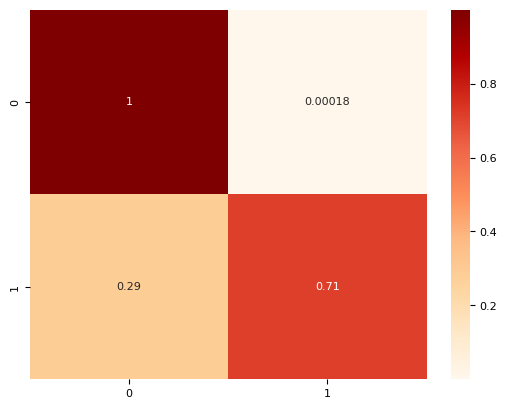

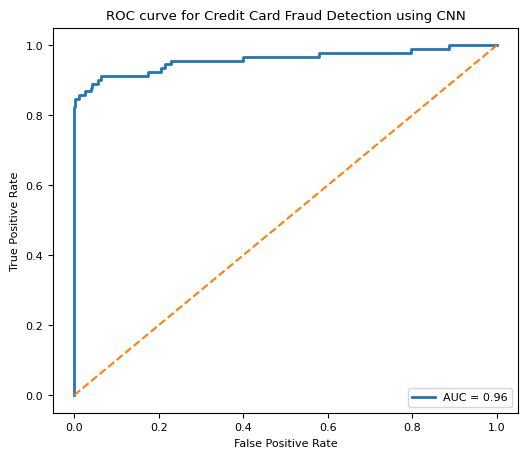

In [71]:
NeuralNetwork(X_train,X_test,y_train,y_test)

<pre style="font-size: 200 px; color: white; background-color: gray;">
<p>Handling Imbalance DataSet To Increase Accuracy of Algorithms</p>
<p>Two ways to handle imbalance dataset</p>
 1. UnderSampling
 2. OverSampling
</pre>

<pre style="background-color: gray;">
1.  Undersampling
</pre>
<p>Undersampling is a technique to balance uneven datasets by keeping all of 
the data in the minority class and decreasing the size of the majority class.</p>

In [30]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

<p style="background-color: gray;">
Shape of Normal transaction
</p>

In [31]:
normal.shape

(275190, 30)

<p style="background-color: gray;">
  Shape of Fraud transaction
</p>

In [32]:
fraud.shape

(473, 30)

<p style="background-color: gray;">
Reducing number of normal transaction to number of fraud transaction i.e to 473.
This is called UnderSampling
</p>

In [33]:
normal_sample = normal.sample(n=473)

<p style="background-color: gray;">
Number of normal transaction is reduced to 473 from 275190
</p>

In [34]:
normal_sample.shape

(473, 30)

<p style="background-color: gray;">
Combine fraud transaction and modified number of normal transaction
</p>

In [35]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [36]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.289861,-0.227338,0.478749,-1.027695,-0.822950,-1.119759,-0.222064,-0.295601,2.911040,-1.585140,0.577922,-1.457576,1.824115,1.341221,-0.206885,-0.984987,0.969929,-0.317201,0.959947,-0.117925,-0.424683,-0.703672,0.030290,0.374459,0.460164,-0.230337,-0.007996,0.010875,-0.313728,0
1,-4.569173,-11.154440,-2.036365,1.553456,-5.217233,0.977623,2.479768,-0.655557,-1.310486,-0.284668,-0.305553,-0.180273,0.711656,-0.298994,-0.225895,-0.805548,1.515034,-0.184759,-1.387853,5.850926,1.565313,-1.805218,-2.525641,0.748455,-1.002476,-0.573420,-0.484181,0.567247,11.981426,0
2,-0.077955,0.299339,1.217893,-0.671353,0.562170,1.114930,0.234183,0.171399,0.865509,-0.689128,-0.313806,0.693437,0.654201,-0.617554,0.807278,-0.962724,0.114387,-1.227929,-1.564958,-0.196247,0.324942,1.410799,-0.106592,-0.993861,-0.592896,-0.233203,-0.120479,-0.179856,-0.313289,0
3,2.063057,-0.333399,-0.738544,0.095454,-0.231086,-0.175587,-0.524818,0.025746,1.497511,-0.212334,-1.722221,-0.180563,-0.408578,0.150425,1.262719,0.499685,-0.942814,0.347142,0.180900,-0.262326,-0.189457,-0.425022,0.239009,-1.140971,-0.265121,-0.853714,0.056825,-0.039556,-0.349231,0
4,-0.895479,0.829340,2.531055,0.337036,0.105965,0.038904,0.614618,0.030782,-0.495015,0.006257,-0.736053,-1.430158,-1.841349,-0.020124,0.587621,0.941380,-0.693132,-0.324176,-2.028352,-0.208299,0.123524,0.296695,-0.323805,0.076315,0.106997,0.895930,-0.339236,-0.179608,-0.295417,0


<p style="background-color: gray;">
Display number of Normal and Fraud Transactions

</p>

In [37]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

<p style="background-color: gray">
Visualization of Data after Under Sampling
</p>

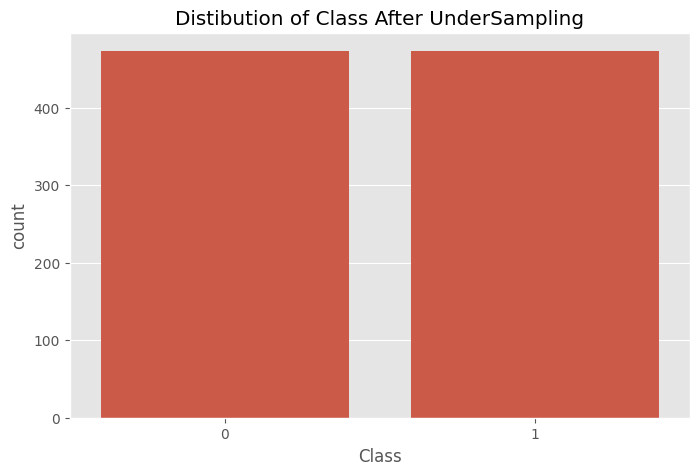

In [38]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class After UnderSampling")
    sns.countplot(data=new_data,x=new_data["Class"])
    plt.show()

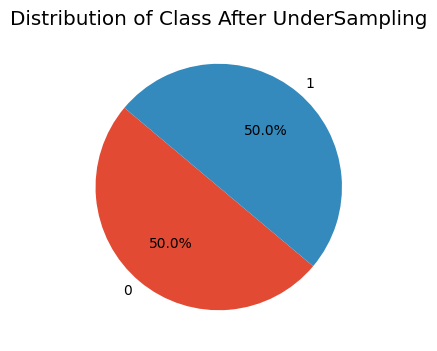

In [39]:
# Count the occurrences of each class
class_counts = new_data["Class"].value_counts()

# Plot the pie chart
with plt.style.context(('ggplot')):
    plt.figure(figsize=(4,4))
    plt.title("Distribution of Class After UnderSampling")
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.show()

<p style="background-color: gray;">
Storing Input data to a variable X and Output data to a variable y
</p>

In [80]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

<p style="background-color: gray;">
Split X and y dataset into train and test dataset
</p>

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


==========Logistic Regression===========
Accuracy: 0.94737
AUC: 0.95020
Precision: 0.98936
Recall: 0.91176
F1 Score: 0.94898

Confusion Matrix


ROC Curve
AUC Score: 0.9502005347593582



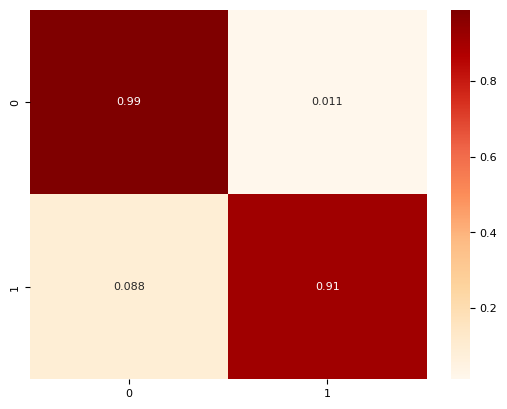

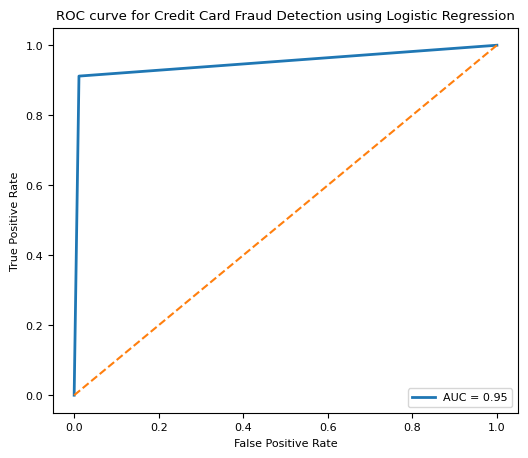


==========Decision Tree Classifier===========
Accuracy: 0.91579
AUC: 0.91611
Precision: 0.93000
Recall: 0.91176
F1 Score: 0.92079

Confusion Matrix


ROC Curve
AUC Score: 0.9161096256684491



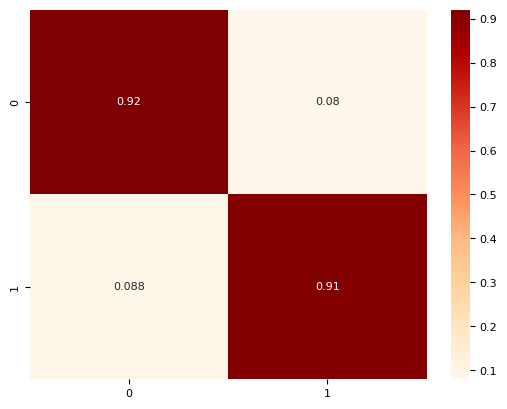

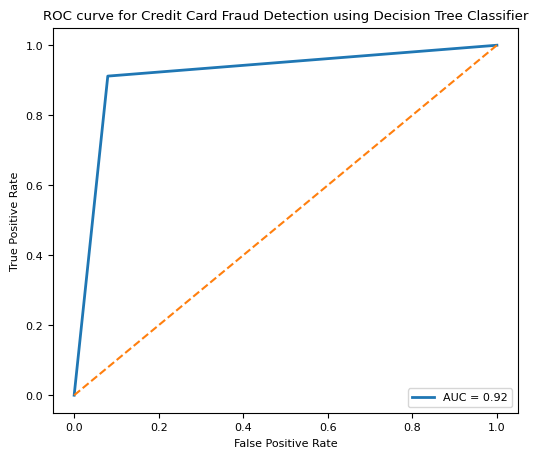


==========Random Forest Classifier===========
Accuracy: 0.93684
AUC: 0.94040
Precision: 0.98913
Recall: 0.89216
F1 Score: 0.93814

Confusion Matrix


ROC Curve
AUC Score: 0.9403966131907309



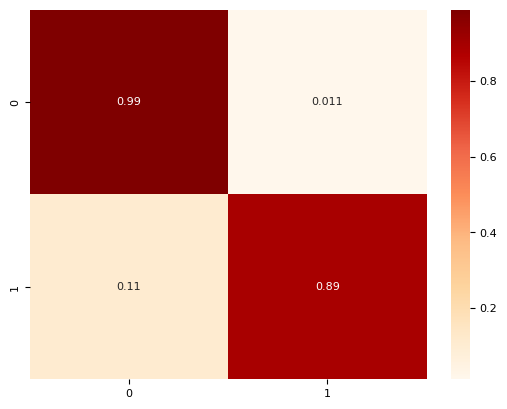

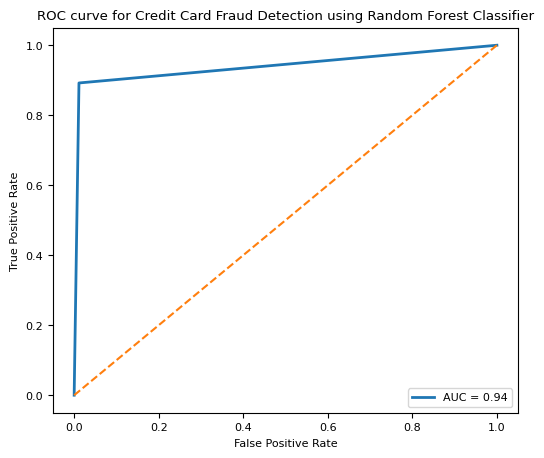


==========Gaussian Naive Bayes===========
Accuracy: 0.90000
AUC: 0.90374
Precision: 0.95604
Recall: 0.85294
F1 Score: 0.90155

Confusion Matrix


ROC Curve
AUC Score: 0.9037433155080214



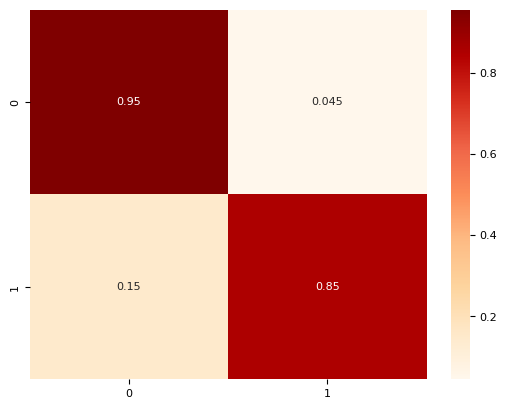

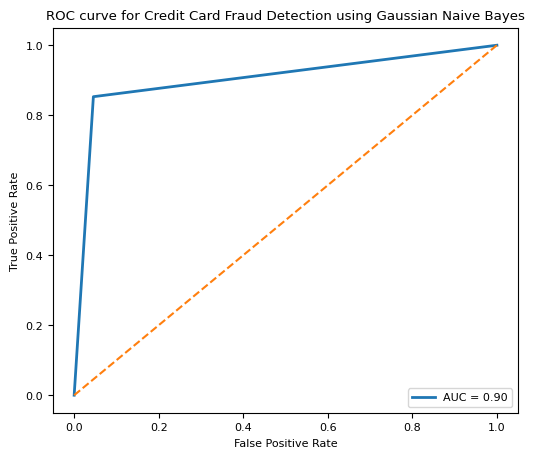


==========Support Vector Machine===========
Accuracy: 0.92632
AUC: 0.92981
Precision: 0.97826
Recall: 0.88235
F1 Score: 0.92784

Confusion Matrix


ROC Curve
AUC Score: 0.9298128342245989



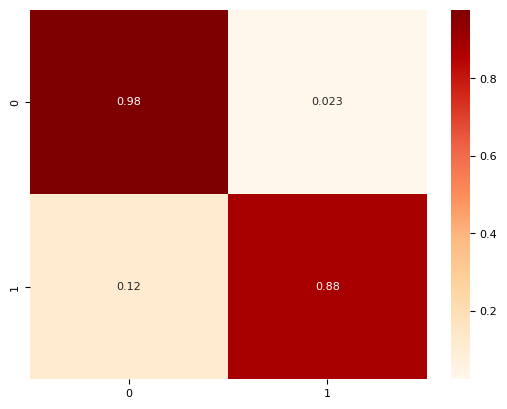

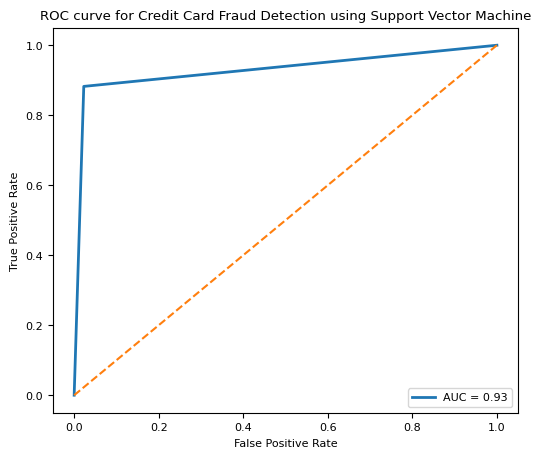


==========XGBoost===========
Accuracy: 0.95263
AUC: 0.95510
Precision: 0.98947
Recall: 0.92157
F1 Score: 0.95431

Confusion Matrix


ROC Curve
AUC Score: 0.955102495543672



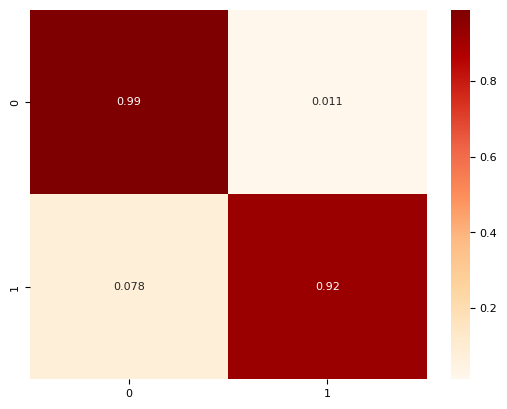

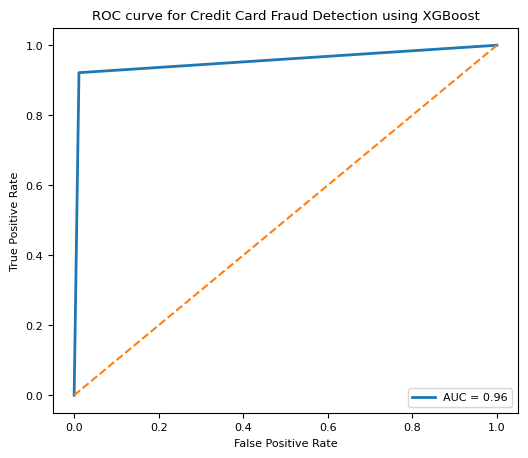


==========Extra_Tree_Classifier===========
Accuracy: 0.93684
AUC: 0.93962
Precision: 0.97872
Recall: 0.90196
F1 Score: 0.93878

Confusion Matrix


ROC Curve
AUC Score: 0.9396167557932263



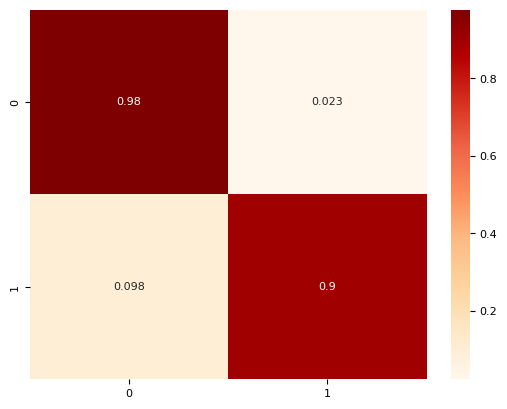

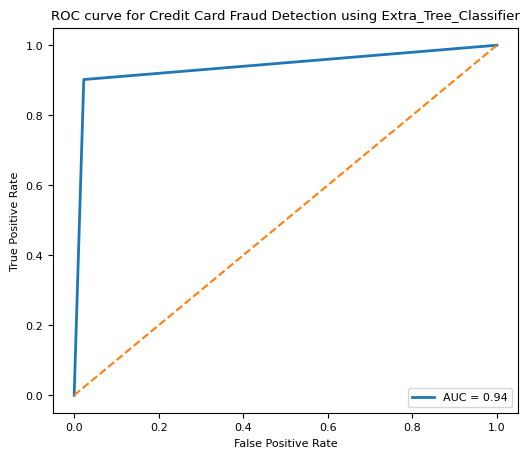


==========LGBM===========
[LightGBM] [Info] Number of positive: 371, number of negative: 385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7315
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490741 -> initscore=-0.037041
[LightGBM] [Info] Start training from score -0.037041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

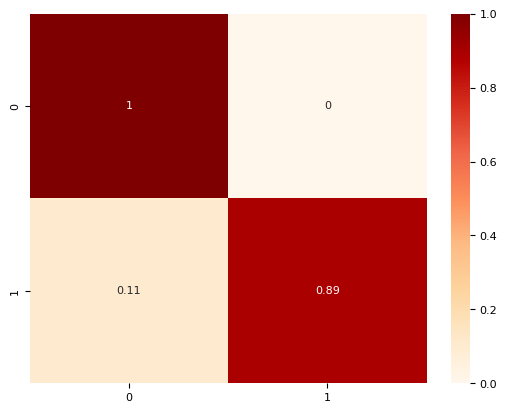

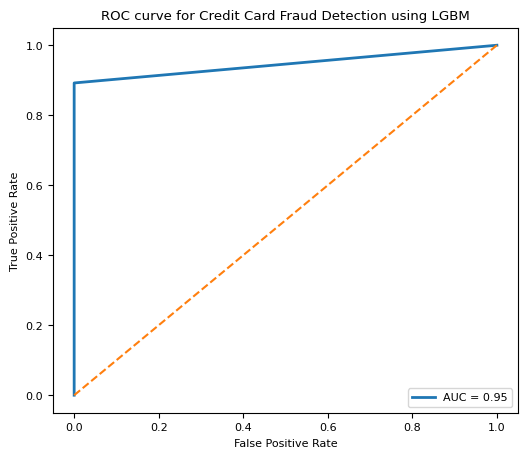

In [82]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Support Vector Machine" : svm.SVC(),
    "XGBoost" : XGBClassifier(max_depth=2),
    "Extra_Tree_Classifier" : ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2),
    "LGBM" : LGBMClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    Classification_Metrics(y_test,y_pred)
    Plot_Roc_Curve(y_test, y_pred,name)

<p style="background-color: gray">
Train, Test and Find accuracy of the CNN model after handling imbalance dataset with <b style="color:red;">UnderSampling</b>
</p>

Epoch 1/10


f:\Dissertation\My Dissertation Project\CreditCardFraudDetection2024\cnnEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4607 - loss: 0.7188 - val_accuracy: 0.8750 - val_loss: 0.5615
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7535 - loss: 0.5608 - val_accuracy: 0.8816 - val_loss: 0.4720
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8313 - loss: 0.4821 - val_accuracy: 0.8947 - val_loss: 0.4171
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8629 - loss: 0.4303 - val_accuracy: 0.8947 - val_loss: 0.3778
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8812 - loss: 0.3840 - val_accuracy: 0.8882 - val_loss: 0.3467
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8891 - loss: 0.3704 - val_accuracy: 0.8882 - val_loss: 0.3245
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8943 - loss: 0.3180 - val_accuracy: 0.9013 - val_loss: 0.3056
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8828 - loss: 0.3240 - val_accuracy: 0.9079 - val_loss: 0.2889
Epoch 9/10


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Classification Report:
               precision    recall  f1-score   support

           0    0.83333   0.96591   0.89474        88
           1    0.96591   0.83333   0.89474       102

    accuracy                        0.89474       190
   macro avg    0.89962   0.89962   0.89474       190
weighted avg    0.90451   0.89474   0.89474       190



ROC Curve
AUC Score: 0.9779411764705883



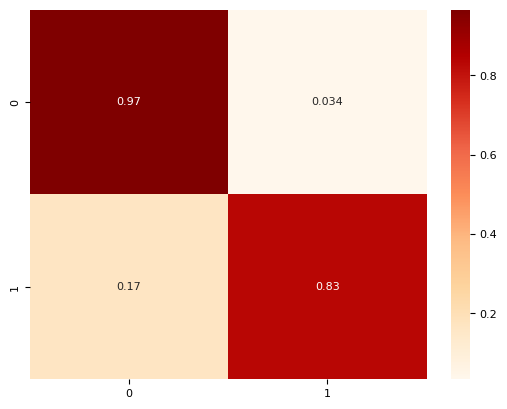

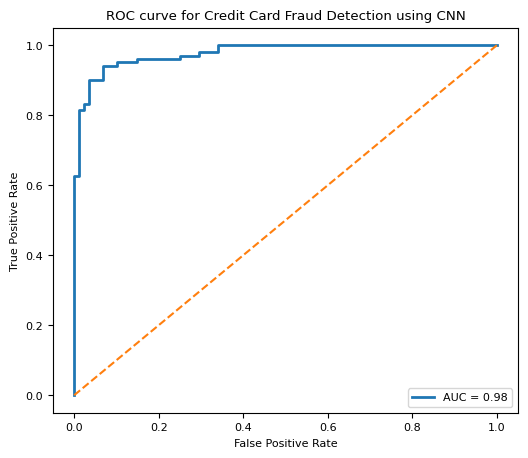

In [83]:
NeuralNetwork(X_train,X_test,y_train,y_test)

<pre style="background-color: gray">
2.  OverSampling
</pre>
<p>Undersampling is a technique to balance uneven datasets by keeping all of 
the data in the majority class and increasing the size of the minority class.</p>

<p style="background-color: gray; color: white;">Common oversampling techniques include random oversampling, SMOTE (Synthetic Minority Oversampling Technique), and ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning). Random oversampling naively duplicates minority examples, while SMOTE and ADASYN strategically generate synthetic new data to augment real instances.
<span style="color: red;">Here, I used SMOTE for oversampling</span></p>
<p style="background-color: gray; color: white;">SMOTE stands for "Synthetic Minority OverSampling Method." In this method, we synthesis new data from the minority class rather than merely replicating existing data. For tabular data, this form of data augmentation can be quite helpful. The acronym "SMOTE"stands for"Synthetic Minority Oversampling TEchnique" and describes this method of creating fresh data.</p>

In [41]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [42]:
X.shape

(275663, 29)

In [43]:
y.shape

(275663,)

<p style="background-color: gray;">
 Import SMOTE for OverSampling
</p>

In [44]:
from imblearn.over_sampling import SMOTE

<p style="background-color: gray">
Doing Resampling of dataset to increasing number of fraud transaction to 275190 from 473
</p>

In [45]:
X_resample, y_resample = SMOTE().fit_resample(X,y)

<p style="background-color: gray">
Display number of Normal and Fraud transactions after OverSampling.
Here, We can see number of fraud transactions increased to 275190 from 473
</p>

In [46]:
y_resample.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

<p style="background-color: gray;">
Visualization After Over Sampling
</p>

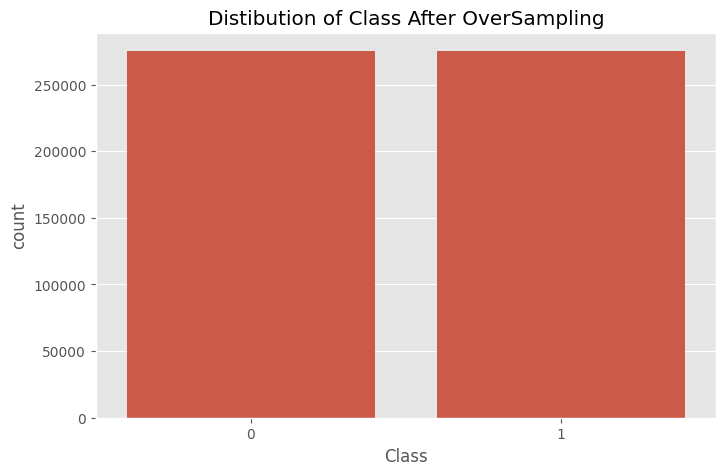

In [54]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distibution of Class After OverSampling")
    sns.countplot(data=X_resample,x=y_resample)
    plt.show()

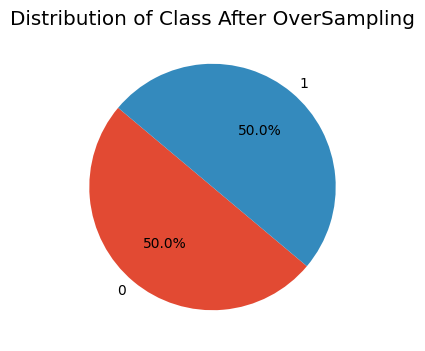

In [55]:
# Count the occurrences of each class
class_counts = y_resample.value_counts()

# Plot the pie chart
with plt.style.context(('ggplot')):
    plt.figure(figsize=(4,4))
    plt.title("Distribution of Class After OverSampling")
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.show()

<p style="background-color: gray;">
Split X_res and y_res dataset into train and test dataset
</p>

In [90]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 42)


==========Logistic Regression===========
Accuracy: 0.94495
AUC: 0.94493
Precision: 0.97294
Recall: 0.91528
F1 Score: 0.94323

Confusion Matrix


ROC Curve
AUC Score: 0.944928271697525



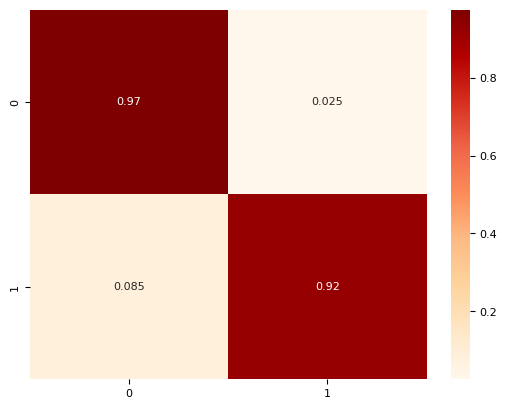

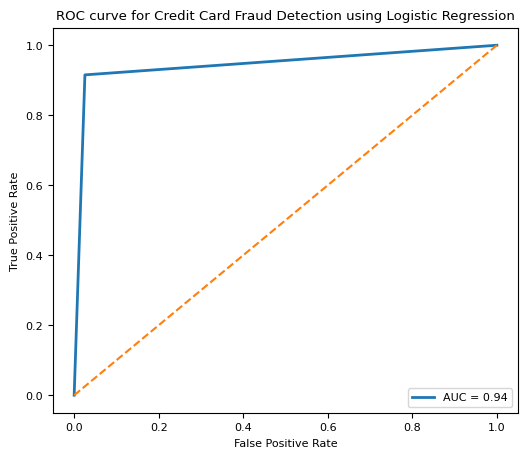


==========Decision Tree Classifier===========
Accuracy: 0.99813
AUC: 0.99813
Precision: 0.99751
Recall: 0.99875
F1 Score: 0.99813

Confusion Matrix


ROC Curve
AUC Score: 0.9981289578069834



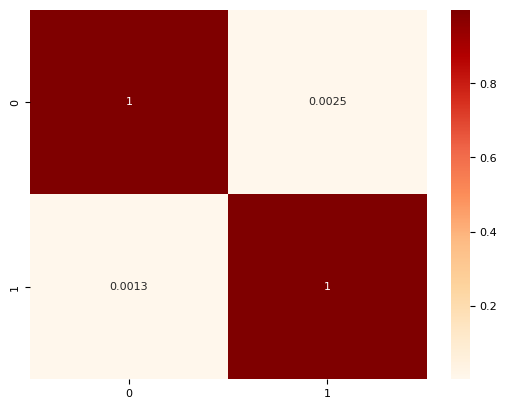

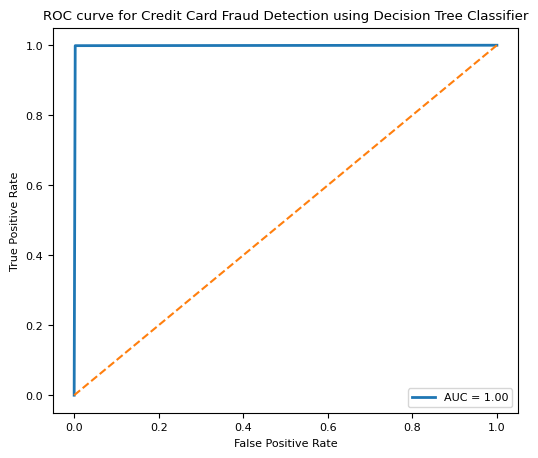


==========Random Forest Classifier===========
Accuracy: 0.99994
AUC: 0.99994
Precision: 0.99987
Recall: 1.00000
F1 Score: 0.99994

Confusion Matrix


ROC Curve
AUC Score: 0.999936447987217



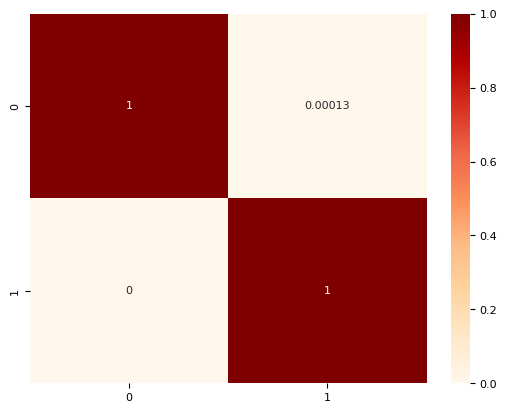

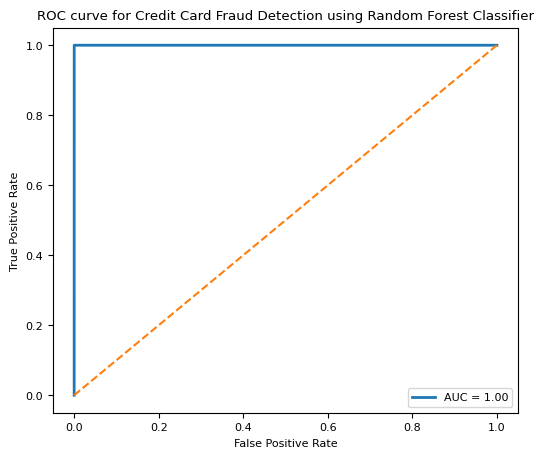


==========Gaussian Naive Bayes===========
Accuracy: 0.91298
AUC: 0.91294
Precision: 0.97238
Recall: 0.84999
F1 Score: 0.90707

Confusion Matrix


ROC Curve
AUC Score: 0.9129382755618741



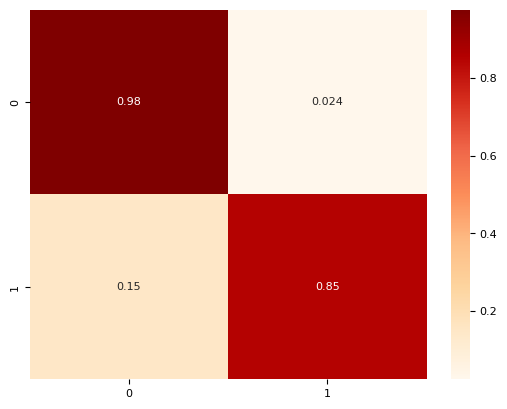

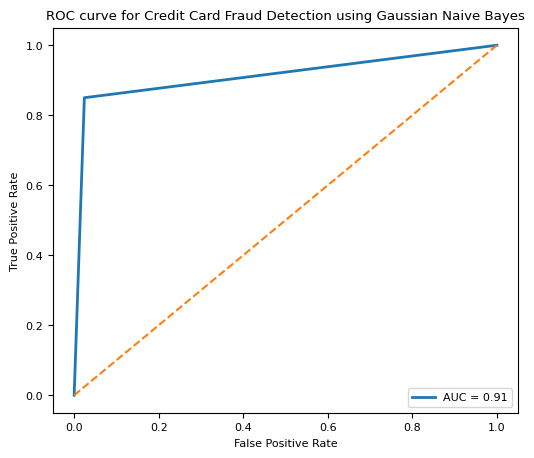


==========Support Vector Machine===========
Accuracy: 0.98043
AUC: 0.98043
Precision: 0.98328
Recall: 0.97746
F1 Score: 0.98036

Confusion Matrix


ROC Curve
AUC Score: 0.9804298104720985



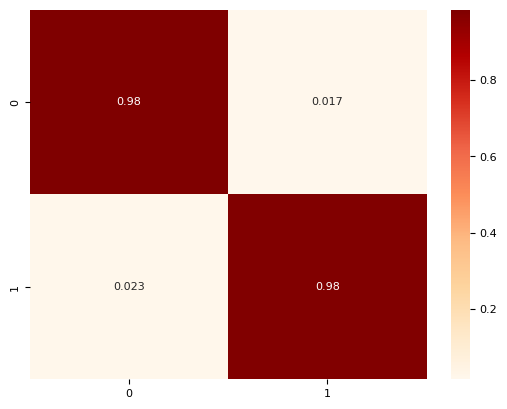

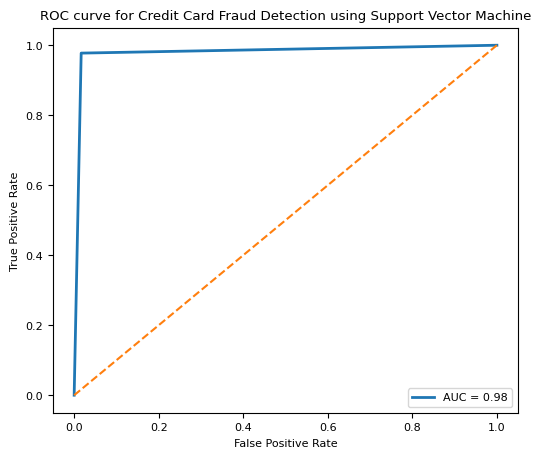


==========XGBoost===========
Accuracy: 0.98495
AUC: 0.98494
Precision: 0.98900
Recall: 0.98078
F1 Score: 0.98487

Confusion Matrix


ROC Curve
AUC Score: 0.9849441178131502



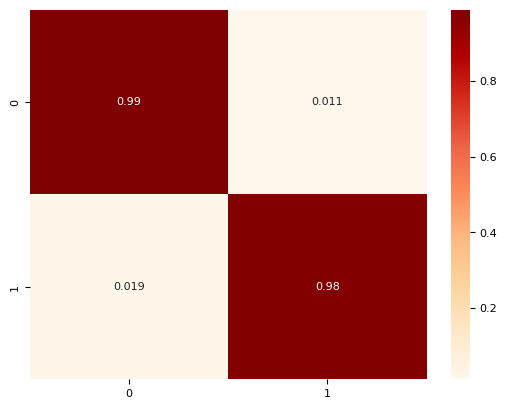

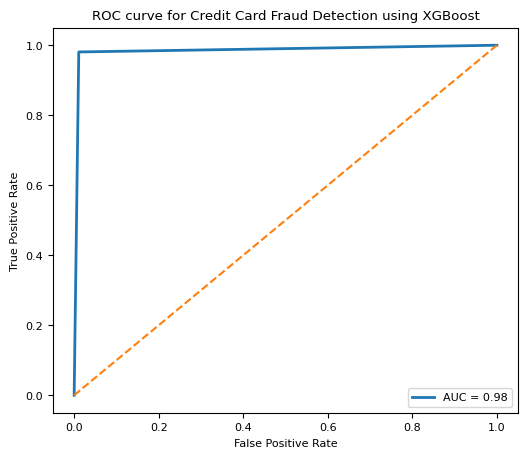


==========Extra_Tree_Classifier===========
Accuracy: 0.99980
AUC: 0.99980
Precision: 0.99960
Recall: 1.00000
F1 Score: 0.99980

Confusion Matrix


ROC Curve
AUC Score: 0.9998002651026818



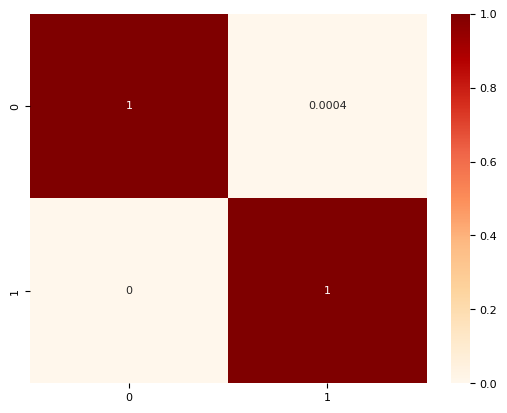

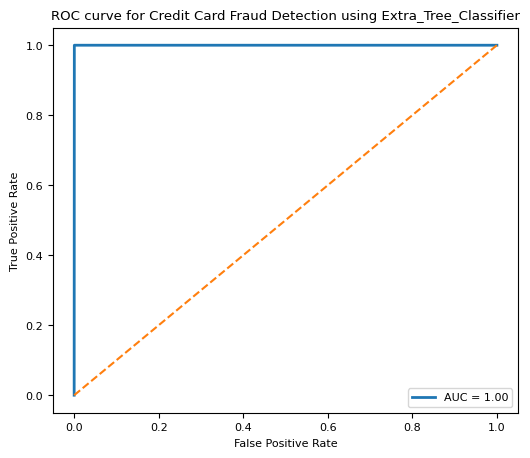


==========LGBM===========
[LightGBM] [Info] Number of positive: 220187, number of negative: 220117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 440304, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000318
[LightGBM] [Info] Start training from score 0.000318
Accuracy: 0.99916
AUC: 0.99916
Precision: 0.99844
Recall: 0.99989
F1 Score: 0.99916

Confusion Matrix


ROC Curve
AUC Score: 0.9991646756491646



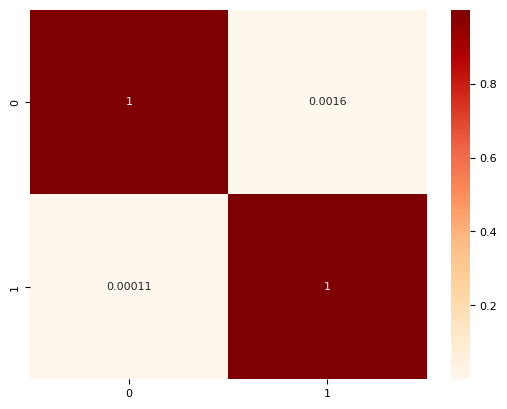

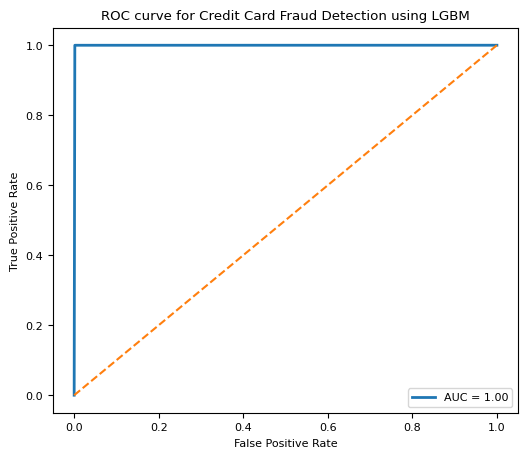

In [91]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Support Vector Machine" : svm.SVC(),
    "XGBoost" : XGBClassifier(max_depth=2),
    "Extra_Tree_Classifier" : ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2),
    "LGBM" : LGBMClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test_res)
    Classification_Metrics(y_test_res,y_pred)
    Plot_Roc_Curve(y_test_res, y_pred,name)

<p style="background-color: gray">
Train, Test and Find accuracy of the CNN model after handling imbalance dataset with <b style="color:red;">OverSampling</b>
</p>

Epoch 1/10


f:\Dissertation\My Dissertation Project\CreditCardFraudDetection2024\cnnEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1762/1762 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9465 - loss: 0.1368 - val_accuracy: 0.9941 - val_loss: 0.0216
Epoch 2/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0214 - val_accuracy: 0.9975 - val_loss: 0.0099
Epoch 3/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9984 - val_loss: 0.0065
Epoch 4/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0091 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 5/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 6/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 7/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9987 - loss: 0.0057 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 8/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accurac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,324 (95.02 KB)

3440/3440 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0    1.00000   0.99893   0.99946     55073
           1    0.99893   1.00000   0.99946     55003

    accuracy                        0.99946    110076
   macro avg    0.99946   0.99946   0.99946    110076
weighted avg    0.99946   0.99946   0.99946    110076



ROC Curve
AUC Score: 0.9999539637823049



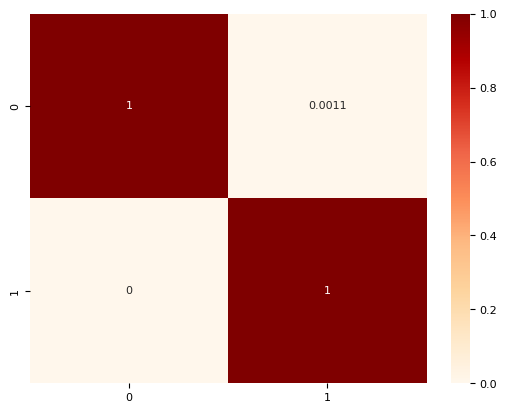

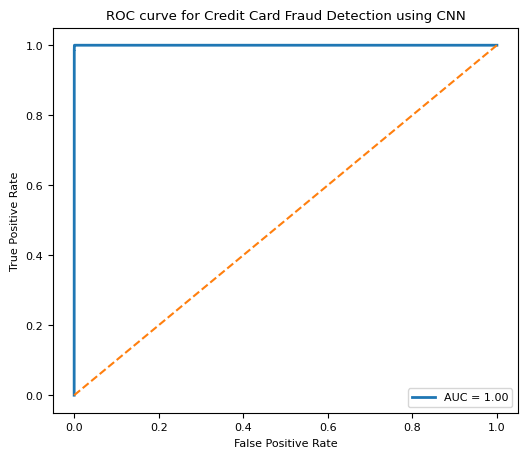

In [102]:
NeuralNetwork(X_train_res,X_test_res,y_train_res,y_test_res)

<h2 style="background-color: gray;">
Model Comparison and Conclusion
</h2>

<h2 style="background-color: gray;">
Selected Best Model 
</h2>

In [93]:
Final_Model = RandomForestClassifier()
Final_Model.fit(X_train_res, y_train_res)
y_pred = Final_Model.predict(X_test_res)

In [94]:
import joblib

In [95]:
joblib.dump(Final_Model, "best_credit_card_model.pkl")

['best_credit_card_model.pkl']

In [96]:
Loaded_model = joblib.load("best_credit_card_model.pkl")

In [97]:
pred = Loaded_model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

f:\Dissertation\My Dissertation Project\CreditCardFraudDetection2024\cnnEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [98]:
pred[0]

0

In [99]:
import streamlit as st

In [100]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
Loaded_model = joblib.load("best_credit_card_model.pkl")

st.title("Credit Card Fraud Detection Using RandomForestClassifier Model")
st.write("Enter the following features to check if the transaction is legitimate or fraudulent:")

# create input fields for user to enter feature values
input_df = st.text_input('Input All features')
input_df_lst = input_df.split(',')
# create a button to submit input and get prediction
submit = st.button("Submit")

if submit:
    # get input feature values
    features = np.array(input_df_lst, dtype=np.float64)
    # make prediction
    prediction = Loaded_model.predict(features.reshape(1,-1))
    # display result
    if prediction[0] == 0:
        st.title("Normal transaction")
    else:
        st.title("Fraudulent transaction")


Overwriting app.py
